In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('e13income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


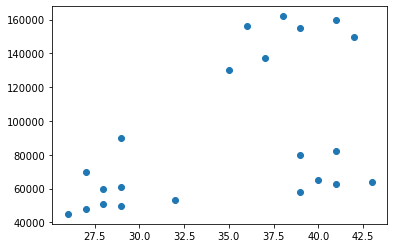

In [4]:
x = df['Age']
y = df['Income($)']
plt.scatter(x,y)

there are 3 cluster ( n_clusters = 3 )

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
df1 = df[df['Cluster'] == 0]
df1.head()

,Name,Age,Income($),Cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0


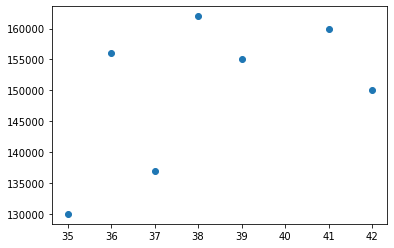

In [8]:
plt.scatter(df1['Age'], df1['Income($)'])

In [9]:
df2 = df[df['Cluster'] == 1]
df2

,Name,Age,Income($),Cluster
2,Mohan,29,61000,1
3,Ismail,28,60000,1
11,Tom,26,45000,1
12,Arnold,27,48000,1
13,Jared,28,51000,1
14,Stark,29,49500,1
15,Ranbir,32,53000,1
16,Dipika,40,65000,1
17,Priyanka,41,63000,1
18,Nick,43,64000,1


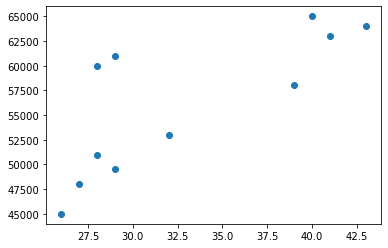

In [10]:
plt.scatter(df2['Age'], df2['Income($)'])

In [11]:
df3 = df[df['Cluster'] == 2]
df3

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


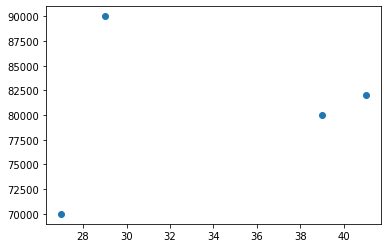

In [12]:
plt.scatter(df3['Age'], df3['Income($)'])

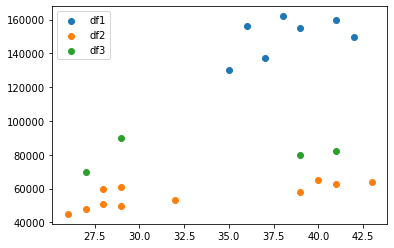

In [13]:
plt.scatter(df1['Age'], df1['Income($)'], label='df1')
plt.scatter(df2['Age'], df2['Income($)'], label='df2')
plt.scatter(df3['Age'], df3['Income($)'], label='df3')
plt.legend()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

the income and age , is not scale

In [15]:
scaler.fit(df[['Income($)']])
df['income'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),Cluster,income
0,Rob,27,70000,2,0.213675
1,Michael,29,90000,2,0.384615
2,Mohan,29,61000,1,0.136752
3,Ismail,28,60000,1,0.128205
4,Kory,42,150000,0,0.897436


In [16]:
scaler.fit(df[['Age']])
df['age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster,income,age
0,Rob,27,70000,2,0.213675,0.058824
1,Michael,29,90000,2,0.384615,0.176471
2,Mohan,29,61000,1,0.136752,0.176471
3,Ismail,28,60000,1,0.128205,0.117647
4,Kory,42,150000,0,0.897436,0.941176


fit the data set into KMeans

In [17]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['age', 'income']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
df['cluster'] = y_predicted

In [19]:
df.head()

,Name,Age,Income($),Cluster,income,age,cluster
0,Rob,27,70000,2,0.213675,0.058824,1
1,Michael,29,90000,2,0.384615,0.176471,1
2,Mohan,29,61000,1,0.136752,0.176471,1
3,Ismail,28,60000,1,0.128205,0.117647,1
4,Kory,42,150000,0,0.897436,0.941176,0


ploting the cluster

with Income($)->income, Age-> age, Cluster-> cluster

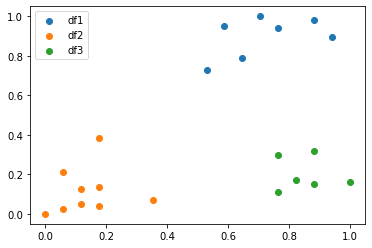

In [20]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['age'], df1['income'], label='df1')
plt.scatter(df2['age'], df2['income'], label='df2')
plt.scatter(df3['age'], df3['income'], label='df3')
plt.legend()

find centriods

In [21]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

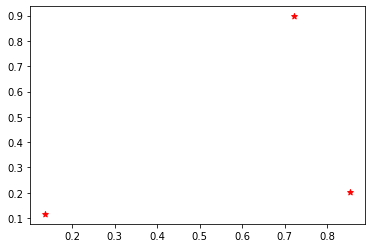

In [22]:
plt.scatter(km.cluster_centers_[ :,0], km.cluster_centers_[:,1], marker='*', color='red')

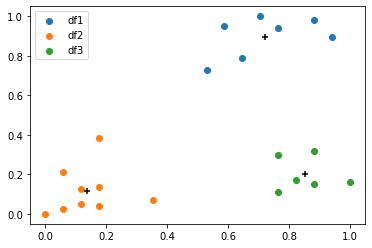

In [23]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['age'], df1['income'], label='df1')
plt.scatter(df2['age'], df2['income'], label='df2')
plt.scatter(df3['age'], df3['income'], label='df3')
plt.scatter(km.cluster_centers_[ :,0], km.cluster_centers_[:,1], marker='+', color='black')
plt.legend()

find SSE/k graph

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


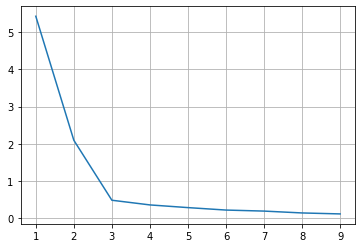

In [29]:
k_rag = range(1,10)
sse = []
for k in k_rag:
    km = KMeans(n_clusters=k)
    km.fit(df[['age', 'income']])
    sse.append(km.inertia_)
sse
plt.plot(k_rag, sse)
plt.grid()
